## Exercise 03 : Bar charts

In [386]:
import pandas as pd
import sqlite3

In [387]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [388]:
query = """
        select uid, timestamp from checker
        where uid like 'user_%'
        """

df = pd.read_sql(query, conn, parse_dates='timestamp')
df

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [389]:
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.dayofweek
df['number_day'] = df['timestamp'].dt.day
df['group_day'] = df['day'].apply(lambda x: 'working_day' if x < 5 else 'weekend')
df = df.sort_values(['day', 'number_day', 'hour'])
df

,uid,timestamp,hour,day,number_day,group_day
1190,user_30,2020-05-04 08:11:43.342744,8,0,4,working_day
1191,user_30,2020-05-04 08:12:17.805617,8,0,4,working_day
1192,user_14,2020-05-04 08:31:33.043296,8,0,4,working_day
1193,user_14,2020-05-04 08:31:38.500068,8,0,4,working_day
1194,user_31,2020-05-04 09:15:57.032274,9,0,4,working_day
...,...,...,...,...,...,...
622,user_13,2020-04-26 22:21:04.093297,22,6,26,weekend
623,user_13,2020-04-26 22:22:59.421699,22,6,26,weekend
624,user_13,2020-04-26 22:22:59.663100,22,6,26,weekend
625,user_13,2020-04-26 23:02:08.398668,23,6,26,weekend


In [390]:
group = df.groupby(['group_day', 'number_day', 'hour']).count().reset_index()
group = group[['group_day', 'number_day', 'hour', 'uid']]
group

,group_day,number_day,hour,uid
0,weekend,2,7,3
1,weekend,2,8,1
2,weekend,2,9,2
3,weekend,2,10,1
4,weekend,2,11,84
...,...,...,...,...
277,working_day,30,10,8
278,working_day,30,11,1
279,working_day,30,15,4
280,working_day,30,18,11


In [391]:
unique = group.groupby(['group_day', 'hour']).mean('uid')
unique = unique['uid'].rename('commits')
result = unique.reset_index()
result

,group_day,hour,commits
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,3,1.000000
3,weekend,5,2.000000
4,weekend,7,4.000000
5,weekend,8,7.000000
6,weekend,9,3.666667
7,weekend,10,7.000000
8,weekend,11,23.600000
9,weekend,12,9.500000


In [392]:
pivot = pd.pivot(result, index='hour', columns='group_day', values='commits')
pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 23
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weekend      21 non-null     float64
 1   working_day  21 non-null     float64
dtypes: float64(2)
memory usage: 440.0 bytes


array([<Axes: title={'center': 'weekend'}, xlabel='hour'>,
       <Axes: title={'center': 'working_day'}, xlabel='hour'>],
      dtype=object)

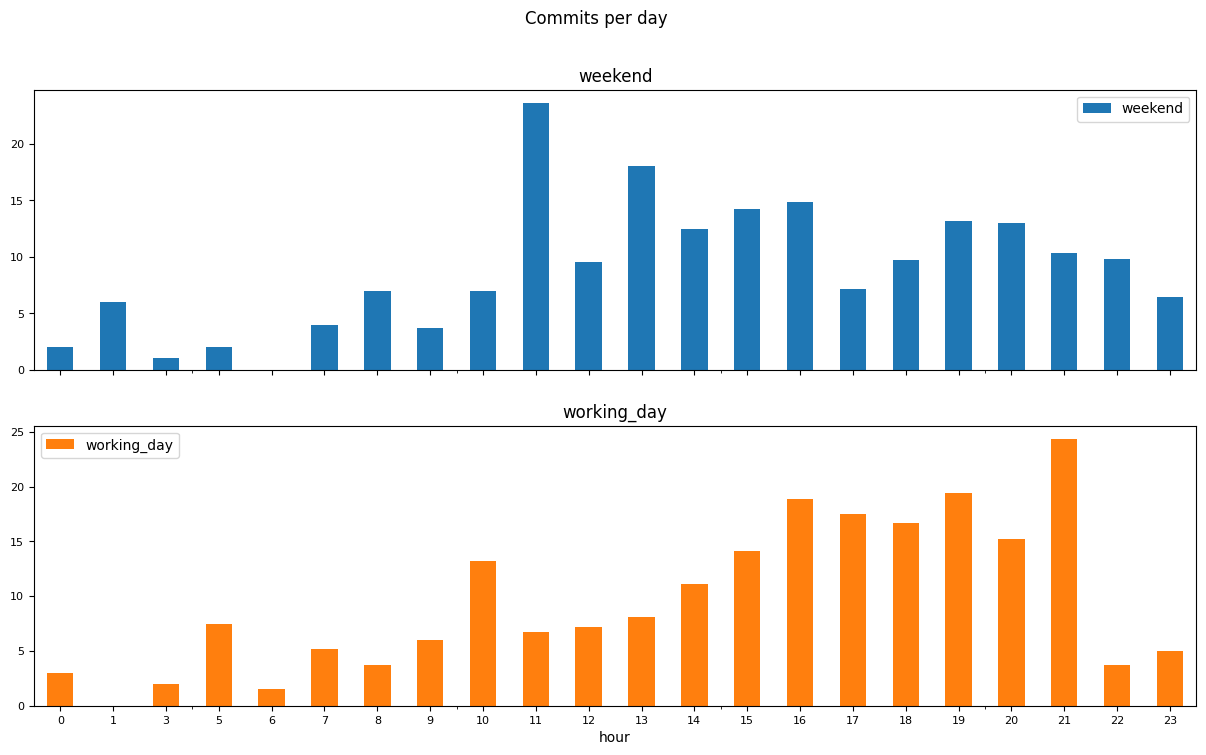

In [393]:
pivot.plot(kind='bar', subplots=True, figsize=(15, 8), fontsize=8, rot=0, title='Commits per day')

## Is the dynamic different on working days and weekends?”, for the answer include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend.

In [394]:
pivot[pivot['working_day'] == pivot['working_day'].max()]

group_day,weekend,working_day
hour,,
21,10.285714,24.333333


In [395]:
pivot[pivot['weekend'] == pivot['weekend'].max()]

group_day,weekend,working_day
hour,,
11,23.6,6.769231


In [396]:
conn.close()